In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pd.set_option('display.max_rows', 200)

In [48]:
#read data
churnData = pd.read_csv('DATA_Customer-Churn.csv')

#print the first 5 rows of the data
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [49]:
#convert column names to lower case
churnData.columns = churnData.columns.str.lower()

In [50]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [51]:
#replace the empty column with null values
churnData['totalcharges'] = churnData['totalcharges'].apply(lambda x: x.strip()).replace('', np.nan)

In [52]:
#convert the column total charges from string to numeric
churnData['totalcharges']= pd.to_numeric(churnData['totalcharges'])

In [53]:
churn_col = churnData['churn']

In [54]:
#checking for the sum of null values in each column
churnData.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [55]:
#filling the null values with the mean of the column
churnData['totalcharges'].fillna((churnData['totalcharges'].mean()), inplace = True)

In [56]:
#get numerical and categorical data splitted 
numerical_dnM = churnData.select_dtypes(exclude=object)
categ_dnM = pd.get_dummies(churnData.select_dtypes(include=object), drop_first=True)

In [57]:
churnData_DM = pd.concat([numerical_dnM, categ_dnM], axis = 1)

In [58]:
#select subset of the data to be scaled
#features to scale tenure, SeniorCitizen, MonthlyCharges and TotalCharges
churnData_DnM = numerical_dnM

In [59]:
#take a copy of churn from the categorical dataframe
churn_yes = categ_dnM['churn_Yes']


In [60]:
#Apply Churn to data frame
churnData_DnM['churn'] =  churn_yes

In [61]:
churnData_DnM['churn'].value_counts().to_frame()

,churn
0,5174
1,1869


In [62]:
TEST_SIZE = 0.30
RANDOM_STATE = 124 # reproduce the same results. disables randomization

#### UP SAMPLING USING SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=RANDOM_STATE)

#### X Y SPLIT

In [64]:
#define X Y
X = churnData_DnM.drop(columns = ['churn'], axis = 1)
y = churnData_DnM['churn']
cols = X.columns

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
#X_train, y_train = smote.fit_resample(X_train, y_train)

#### LOGISITIC REGRESSION 

Accuracy of logistic regression classifier on test set: 0.79
[[1423  130]
 [ 305  255]]


/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


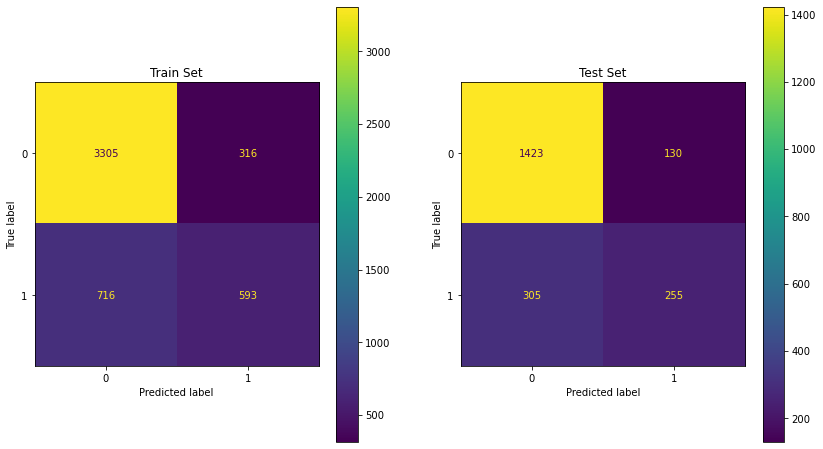

In [66]:
model = LogisticRegression()

#applying logistic regression on our train set
model.fit(X_train, y_train)

#Prediciting and testing for accuracy
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


In [67]:
#### CROSS VALIDATION
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.80223124, 0.78803245, 0.75862069, 0.80324544, 0.78397566])

In [68]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


#### KNN CLASSIFIER

In [28]:
TEST_SIZE = 0.30
RANDOM_STATE = 32 # reproduce the same results. disables randomization

In [29]:
#define X Y
X = churnData_DnM.drop(columns = ['churn'], axis = 1)
y = churnData_DnM['churn']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [36]:
## STANDARD SCALING
scaler = StandardScaler()

# transforming data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)


In [43]:
X_test.shape

(2113, 4)

In [44]:
X_train.shape

(4930, 4)

In [45]:
#Using smote
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

#fit model to train sets only 
model.fit(X_train_scaled, y_train)

#use our train model to predict test set
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train_scaled)

# performance_knn, _, _ = model(y_train, y_pred_train, y_test, y_pred_test)
# performance_knn

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


#### DECISION TREE

In [69]:
#import decision tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### X Y SPLIT

In [70]:
TEST_SIZE = 0.30
RANDOM_STATE = 32 # reproduce the same results. disables randomization

In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [72]:
churnData_DM

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#define X Y
X = churnData_DM.drop(columns = ['churn_Yes'], axis = 1)
y = churnData_DM['churn_Yes']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [75]:
#There is no scaling in Decision tree 
#fitting Decision Tree Classifier on train set
model = DecisionTreeClassifier(max_depth=4)
model = model.fit(X_train, y_train)

,Error_metric,Train,Test
0,Accuracy,0.791213,0.688121
1,Precision,0.749243,0.477273
2,Recall,0.875408,0.751220


/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


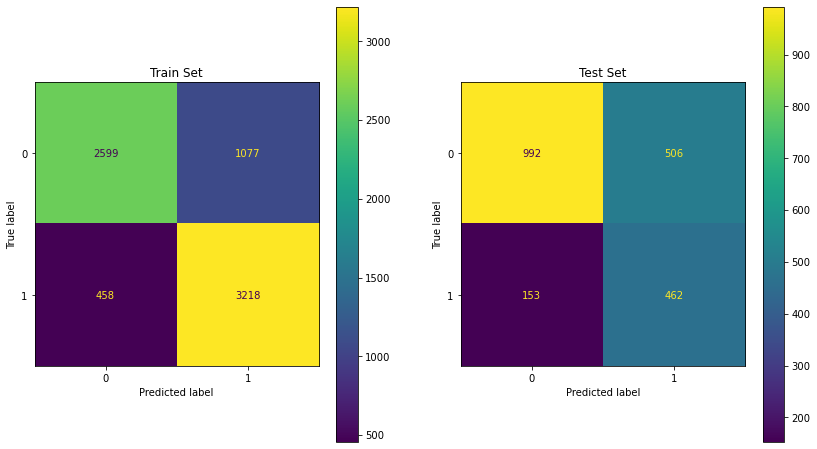

In [76]:
#Check the accuracy on the test data
y_pred_clf_test = model.predict(X_test)
y_pred_clf_train = model.predict(X_train)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_clf_train),
                                         precision_score(y_train, y_pred_clf_train),
                                         recall_score(y_train, y_pred_clf_train)],
                               'Test': [accuracy_score(y_test, y_pred_clf_test),
                                        precision_score(y_test, y_pred_clf_test),
                                        recall_score(y_test, y_pred_clf_test)]})


display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


<BarContainer object of 22 artists>

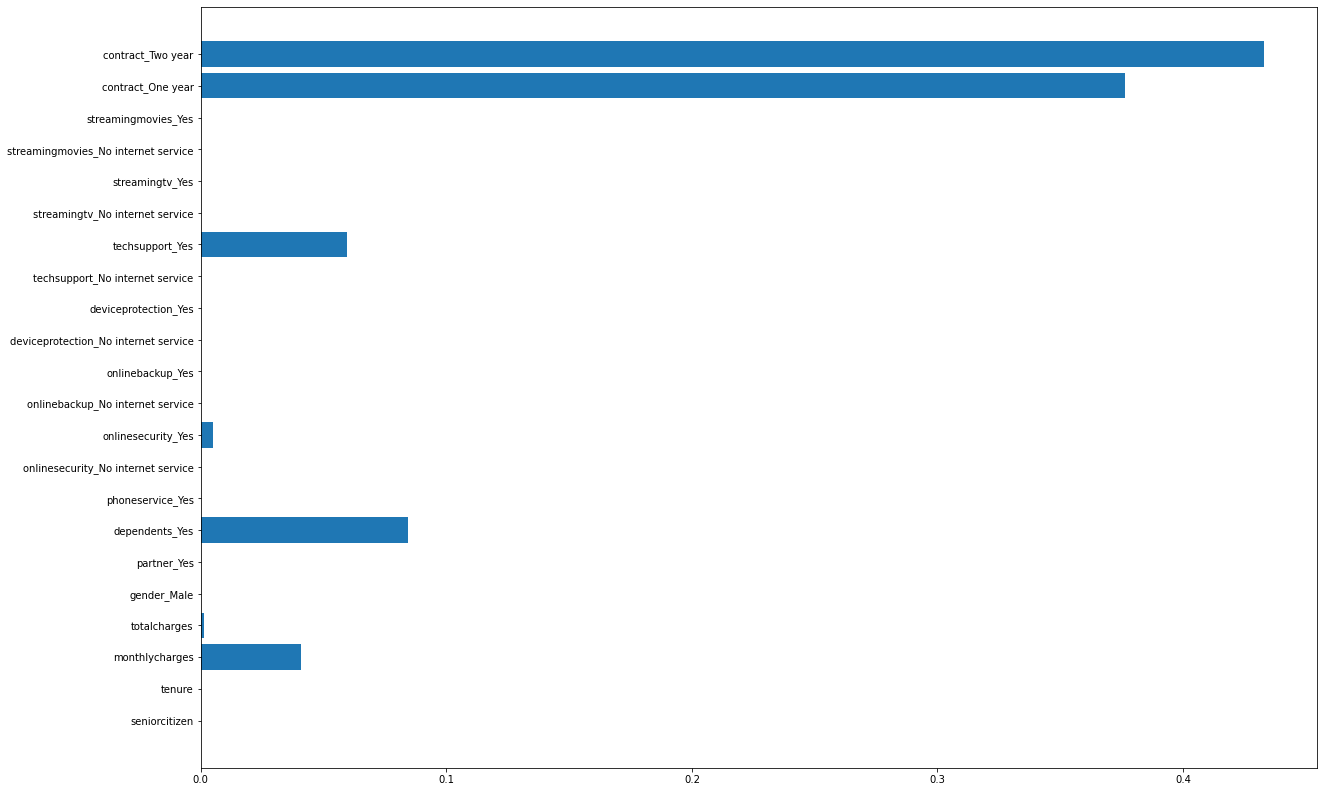

In [77]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

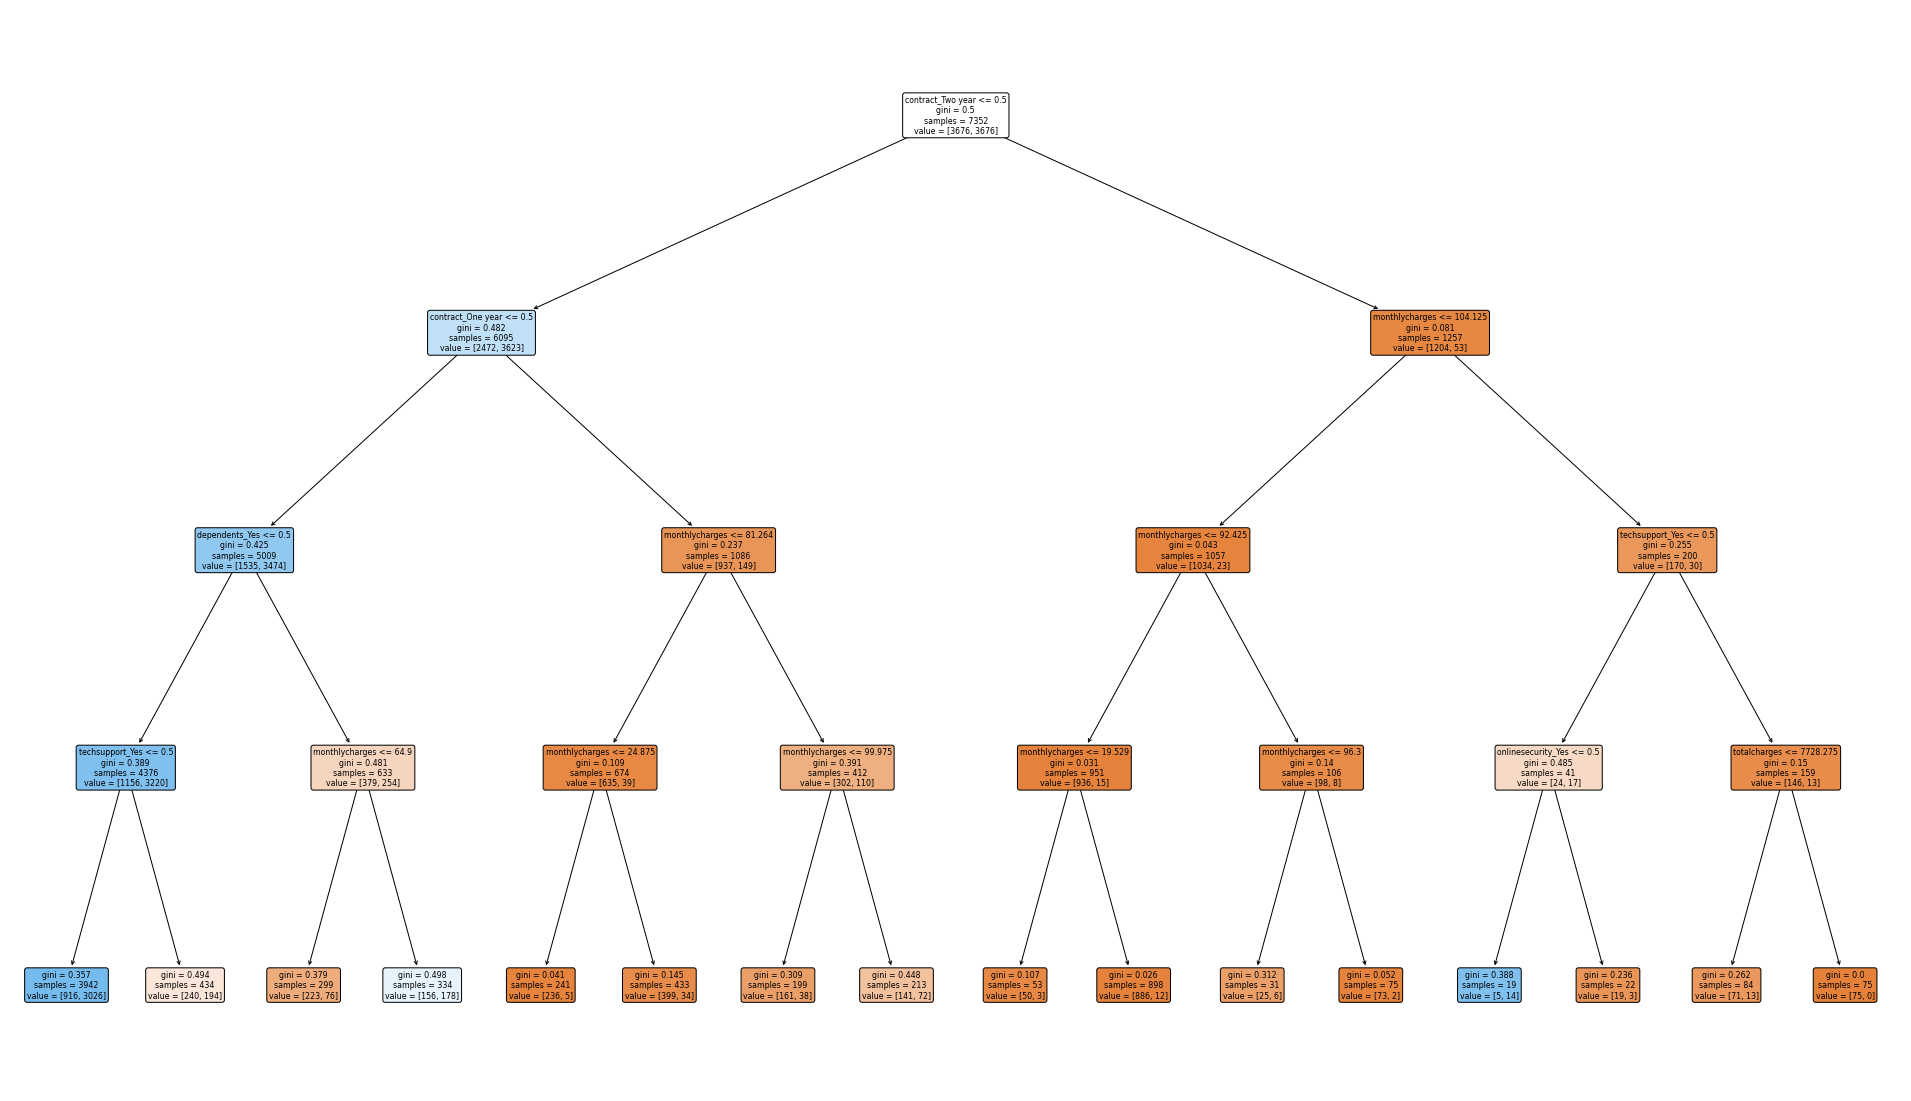

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [79]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.71312033, 0.72331747, 0.82721088, 0.81836735, 0.81292517])

In [80]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.05


#### K CROSS VALIDATION

In [ ]:
#implementing cross validation
# Split the data into 5 folds
k = 5
kf = KFold(n_splits=k, shuffle = True, random_state=42)
logmodel = LogisticRegression(solver='liblinear')

In [ ]:
acc_score  = []

for train_index, test_index in kf.split(X):
    X_train, X_test =X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    logmodel.fit(X_train, y_train)
    pred_values = logmodel.predict(X_test)
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

In [ ]:
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

#### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))